In [1276]:
import pandas as pd
import missingno as msno 
import numpy as np
import matplotlib.pyplot as plt

In [1277]:
df_pop = pd.read_csv('df_pop.csv')

In [1278]:
df_anim = pd.read_csv('df_anim.csv')

In [1279]:
df_veg = pd.read_csv('df_veg.csv')

In [1280]:
df_pop2018 = pd.read_csv('pop_annuelle_2018.csv')

In [1281]:
#[1]Quelle est la dimension des jeux de données ?
len(df_anim)

30897

In [1282]:
#Quelle est la dimension des jeux de données ?
len(df_pop)

358

In [1283]:
#Quelle est la dimension des jeux de données ? (nvlle version diff. Avant 121965)
len(df_veg)

91068

In [1284]:
#[2]A quoi ressemblent les 5 premières lignes de mes jeux de données ?
first_lines_veg = df_veg.head

In [1285]:
#A quoi ressemblent les 5 premières lignes de mes jeux de données ?
first_lines_anim = df_anim.head

In [1286]:
#A quoi ressemblent les 5 premières lignes de mes jeux de données ?
first_lines_pop = df_pop.head

In [1287]:
#[3]Ajouter une colonne ‘type’ qui prendra respectivement une valeur ‘animal product’ et ‘vegetal_product’
df_anim['type'] = 'animal product'

In [1288]:
#Pour vérifier ajout colonne
new_column = df_anim.head(5)

In [1289]:
#Nombre d'éléments et de colonnes
df_anim.shape

(30897, 15)

In [1290]:
#Ajouter une colonne ‘type’ qui prendra respectivement une valeur ‘animal product’ et ‘vegetal_product’
df_veg['type'] = 'veg product'

In [1291]:
#Nombre d'éléments et de colonnes
df_veg.shape

(91068, 15)

In [1292]:
#Pour vérifier ajout colonne
added_column = df_veg.head(5)

In [1293]:
#Regroupez les deux jeux de données en 1 et appelez ce DataFrame product
product = pd.concat([df_veg, df_anim])

In [1294]:
df_pop.head(5)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,37172.0,*,Unofficial figure
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38042.0,*,Unofficial figure
2,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,2883.0,*,Unofficial figure
3,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,2881.0,*,Unofficial figure
4,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,42228.0,*,Unofficial figure


In [1295]:
#[4] Enlever certaines colonnes
df_pop2 = df_pop.drop(['Domain Code', 'Domain', 'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Unit', 'Flag', 'Flag Description'], axis =1)
#ou écrire ce qu'on garde df_pop2 = df_pop['area', 'year']

In [1296]:
df_pop2.head(1)

,Area Code (FAO),Area,Year,Value
0,2,Afghanistan,2018,37172.0


In [1297]:
#[5] Nettoyer : Supprimez les majuscules
df_pop3 = df_pop2.rename(str.lower, axis = 1)


In [1298]:
df_pop3.head(1)

,area code (fao),area,year,value
0,2,Afghanistan,2018,37172.0


In [1299]:
#Nettoyer : Supprimez les espaces inutiles 
df_pop3.columns = df_pop3.columns.str.strip()

In [1300]:
df_pop3.head(2)

,area code (fao),area,year,value
0,2,Afghanistan,2018,37172.0
1,2,Afghanistan,2019,38042.0


In [1301]:
#Nettoyer : remplacez les espaces (utiles) par des ‘_’
df_pop3.columns = df_pop3.columns.str.replace(' ', '_')

In [1302]:
df_pop3.head(1)

,area_code_(fao),area,year,value
0,2,Afghanistan,2018,37172.0


In [1303]:
df_pop4 = df_pop3.rename(columns={'value': 'pop_1000_hab'})

In [1304]:
df_pop4.head(1)

,area_code_(fao),area,year,pop_1000_hab
0,2,Afghanistan,2018,37172.0


In [1305]:
product.head(5)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,type
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,Fc,Calculated data,veg product
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,161.93,Fc,Calculated data,veg product
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2018,2018,kcal/capita/day,1372.00,Fc,Calculated data,veg product
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2019,2019,kcal/capita/day,1387.00,Fc,Calculated data,veg product
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2018,2018,g/capita/day,37.00,Fc,Calculated data,veg product


In [1306]:
#[4] Enlever certaines colonnes
product2 = product.drop(['Domain Code', 'Domain', 'Element Code', 'Item Code', 'Year Code', 'Flag', 'Flag Description'], axis =1)

In [1307]:
product2.head(1)

,Area Code (FAO),Area,Element,Item,Year,Unit,Value,type
0,2,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,kg,160.12,veg product


In [1308]:
#[5] Nettoyer : Supprimez les majuscules
product2 = product2.rename(str.lower, axis = 1)

In [1309]:
product2.head(1)

,area code (fao),area,element,item,year,unit,value,type
0,2,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,kg,160.12,veg product


In [1310]:
#Nettoyer : Supprimez les espaces inutiles 
product2.columns = product2.columns.str.strip()

In [1311]:
product2.head(1)

,area code (fao),area,element,item,year,unit,value,type
0,2,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,kg,160.12,veg product


In [1312]:
#Nettoyer : remplacez les espaces (utiles) par des ‘_’
product2.columns = product2.columns.str.replace(' ', '_')

In [1313]:
product2.head(1)

,area_code_(fao),area,element,item,year,unit,value,type
0,2,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,kg,160.12,veg product


In [1314]:
#[7] Fusionnez df_pop avec products 
df = pd.merge(df_pop4,product2, on = ['area_code_(fao)','year'])

In [1315]:
df.head(5)

,area_code_(fao),area_x,year,pop_1000_hab,area_y,element,item,unit,value,type
0,2,Afghanistan,2018,37172.0,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,kg,160.12,veg product
1,2,Afghanistan,2018,37172.0,Afghanistan,Food supply (kcal/capita/day),Wheat and products,kcal/capita/day,1372.00,veg product
2,2,Afghanistan,2018,37172.0,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,g/capita/day,37.00,veg product
3,2,Afghanistan,2018,37172.0,Afghanistan,Fat supply quantity (g/capita/day),Wheat and products,g/capita/day,4.59,veg product
4,2,Afghanistan,2018,37172.0,Afghanistan,Food supply quantity (kg/capita/yr),Rice and products,kg,19.78,veg product


In [1316]:
df0 = df.drop('area_y', axis=1)


In [1317]:
df0 = df0.rename(columns={'area_x': 'area'})

In [1318]:
df0


,area_code_(fao),area,year,pop_1000_hab,element,item,unit,value,type
0,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Wheat and products,kg,160.12,veg product
1,2,Afghanistan,2018,37172.0,Food supply (kcal/capita/day),Wheat and products,kcal/capita/day,1372.00,veg product
2,2,Afghanistan,2018,37172.0,Protein supply quantity (g/capita/day),Wheat and products,g/capita/day,37.00,veg product
3,2,Afghanistan,2018,37172.0,Fat supply quantity (g/capita/day),Wheat and products,g/capita/day,4.59,veg product
4,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Rice and products,kg,19.78,veg product
...,...,...,...,...,...,...,...,...,...
121960,181,Zimbabwe,2019,14645.0,Fat supply quantity (g/capita/day),"Aquatic Animals, Others",g/capita/day,0.00,animal product
121961,181,Zimbabwe,2019,14645.0,Food supply quantity (kg/capita/yr),Aquatic Plants,kg,0.00,animal product
121962,181,Zimbabwe,2019,14645.0,Food supply (kcal/capita/day),Aquatic Plants,kcal/capita/day,0.00,animal product
121963,181,Zimbabwe,2019,14645.0,Protein supply quantity (g/capita/day),Aquatic Plants,g/capita/day,0.00,animal product


In [1319]:
df2 = df0.iloc [:, [0, 1, 2, 3, 4, 5, 6, 8, 7]]

In [1320]:
df2

,area_code_(fao),area,year,pop_1000_hab,element,item,unit,type,value
0,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Wheat and products,kg,veg product,160.12
1,2,Afghanistan,2018,37172.0,Food supply (kcal/capita/day),Wheat and products,kcal/capita/day,veg product,1372.00
2,2,Afghanistan,2018,37172.0,Protein supply quantity (g/capita/day),Wheat and products,g/capita/day,veg product,37.00
3,2,Afghanistan,2018,37172.0,Fat supply quantity (g/capita/day),Wheat and products,g/capita/day,veg product,4.59
4,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Rice and products,kg,veg product,19.78
...,...,...,...,...,...,...,...,...,...
121960,181,Zimbabwe,2019,14645.0,Fat supply quantity (g/capita/day),"Aquatic Animals, Others",g/capita/day,animal product,0.00
121961,181,Zimbabwe,2019,14645.0,Food supply quantity (kg/capita/yr),Aquatic Plants,kg,animal product,0.00
121962,181,Zimbabwe,2019,14645.0,Food supply (kcal/capita/day),Aquatic Plants,kcal/capita/day,animal product,0.00
121963,181,Zimbabwe,2019,14645.0,Protein supply quantity (g/capita/day),Aquatic Plants,g/capita/day,animal product,0.00


In [1321]:
#[8]Types de données de chaque colonne
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121965 entries, 0 to 121964
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   area_code_(fao)  121965 non-null  int64  
 1   area             121965 non-null  object 
 2   year             121965 non-null  int64  
 3   pop_1000_hab     121965 non-null  float64
 4   element          121965 non-null  object 
 5   item             121965 non-null  object 
 6   unit             121965 non-null  object 
 7   type             121965 non-null  object 
 8   value            121965 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 9.3+ MB


In [1322]:
#[9]Combien y-a t’il de valeurs manquantes par variable ?
count = df2["area_code_(fao)"].isna().sum()

In [1323]:
count

0

<AxesSubplot:>

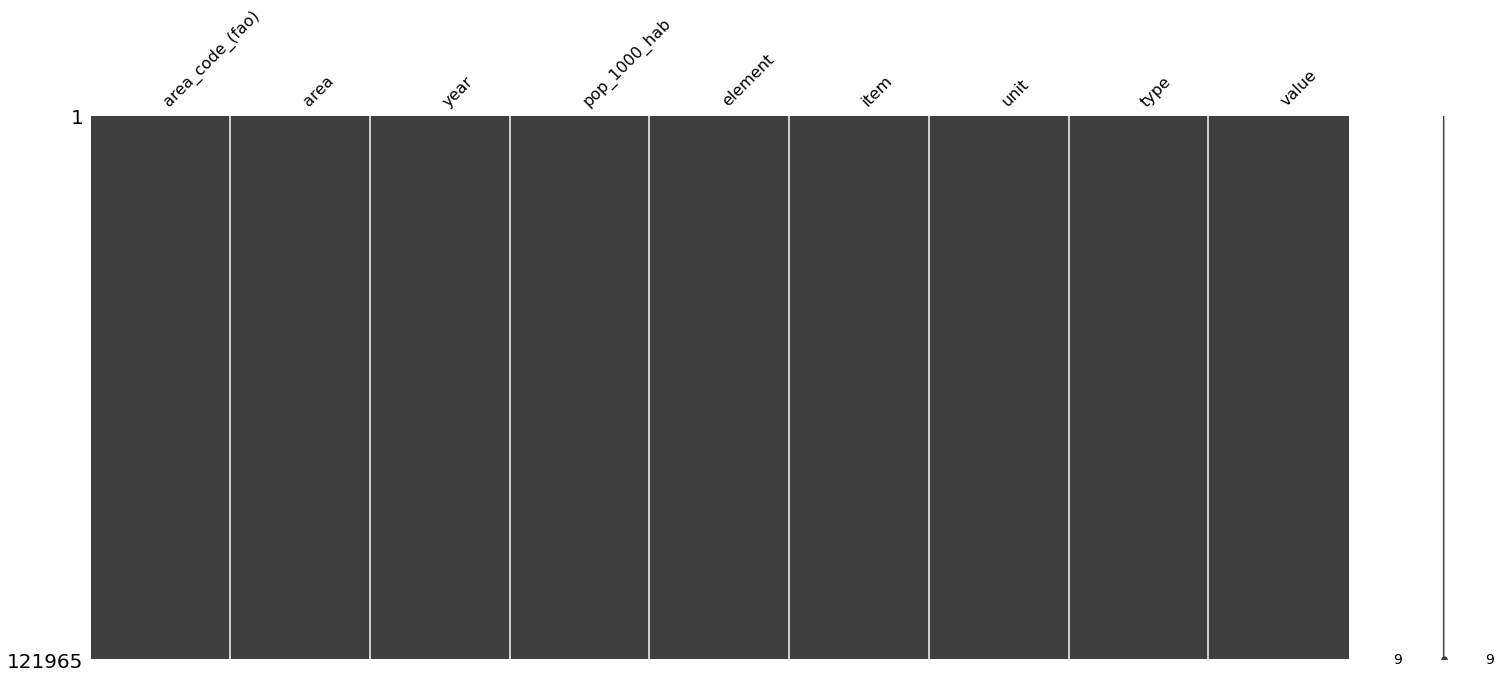

In [1324]:
msno.matrix(df2)

In [1325]:
#[10] Valeurs aberrantes
df2.describe()

,area_code_(fao),year,pop_1000_hab,value
count,121965.000000,121965.000000,1.219650e+05,121965.000000
mean,127.332899,2018.499889,4.369155e+04,10.952411
std,73.062851,0.500002,1.538962e+05,56.049315
min,1.000000,2018.000000,5.200000e+01,-0.030000
25%,66.000000,2018.000000,2.883000e+03,0.000000
50%,123.000000,2018.000000,9.972000e+03,0.150000
75%,191.000000,2019.000000,3.182500e+04,2.900000
max,276.000000,2019.000000,1.433784e+06,1787.000000


In [1326]:
#[11] Valeurs uniques dans colonne 'area'
df2.area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gamb

In [1327]:
#[13] Modifier dataframe 
df3 = df2.drop(['unit'], axis =1)
df3

,area_code_(fao),area,year,pop_1000_hab,element,item,type,value
0,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Wheat and products,veg product,160.12
1,2,Afghanistan,2018,37172.0,Food supply (kcal/capita/day),Wheat and products,veg product,1372.00
2,2,Afghanistan,2018,37172.0,Protein supply quantity (g/capita/day),Wheat and products,veg product,37.00
3,2,Afghanistan,2018,37172.0,Fat supply quantity (g/capita/day),Wheat and products,veg product,4.59
4,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Rice and products,veg product,19.78
...,...,...,...,...,...,...,...,...
121960,181,Zimbabwe,2019,14645.0,Fat supply quantity (g/capita/day),"Aquatic Animals, Others",animal product,0.00
121961,181,Zimbabwe,2019,14645.0,Food supply quantity (kg/capita/yr),Aquatic Plants,animal product,0.00
121962,181,Zimbabwe,2019,14645.0,Food supply (kcal/capita/day),Aquatic Plants,animal product,0.00
121963,181,Zimbabwe,2019,14645.0,Protein supply quantity (g/capita/day),Aquatic Plants,animal product,0.00


In [1328]:
table = pd.pivot_table(df3, values='value', index= ['area_code_(fao)', 'area', 'year', 'pop_1000_hab', 'type', 'item'], columns= ['element']).reset_index()
table

element,area_code_(fao),area,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,2952.0,animal product,"Aquatic Animals, Others",0.00,0.0,0.00,0.00
1,1,Armenia,2018,2952.0,animal product,Aquatic Plants,0.00,0.0,0.00,0.00
2,1,Armenia,2018,2952.0,animal product,Bovine Meat,11.41,145.0,24.05,9.85
3,1,Armenia,2018,2952.0,animal product,"Butter, Ghee",3.54,31.0,1.59,0.04
4,1,Armenia,2018,2952.0,animal product,Cephalopods,0.00,0.0,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...
30661,276,Sudan,2019,42813.0,veg product,Tomatoes and products,0.10,9.0,15.36,0.41
30662,276,Sudan,2019,42813.0,veg product,"Vegetables, other",0.14,20.0,27.51,0.90
30663,276,Sudan,2019,42813.0,veg product,Wheat and products,1.67,535.0,61.56,16.00
30664,276,Sudan,2019,42813.0,veg product,Wine,0.00,0.0,0.00,0.00


Etape n°3 1) Quelle est la médiane de la variable fat_supply_quantity_(g/capita/day) ? Q1 ? Q3 ? La moyenne ? L’écart type ? (il existe une méthode pour visualiser toutes ces informations en même temps). Interprétez ces mesures statistiques dans une phrase.


In [1329]:
table.head()

element,area_code_(fao),area,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,2952.0,animal product,"Aquatic Animals, Others",0.00,0.0,0.00,0.00
1,1,Armenia,2018,2952.0,animal product,Aquatic Plants,0.00,0.0,0.00,0.00
2,1,Armenia,2018,2952.0,animal product,Bovine Meat,11.41,145.0,24.05,9.85
3,1,Armenia,2018,2952.0,animal product,"Butter, Ghee",3.54,31.0,1.59,0.04
4,1,Armenia,2018,2952.0,animal product,Cephalopods,0.00,0.0,0.01,0.00


In [1330]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30666 entries, 0 to 30665
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   area_code_(fao)                         30666 non-null  int64  
 1   area                                    30666 non-null  object 
 2   year                                    30666 non-null  int64  
 3   pop_1000_hab                            30666 non-null  float64
 4   type                                    30666 non-null  object 
 5   item                                    30666 non-null  object 
 6   Fat supply quantity (g/capita/day)      30447 non-null  float64
 7   Food supply (kcal/capita/day)           30407 non-null  float64
 8   Food supply quantity (kg/capita/yr)     30666 non-null  float64
 9   Protein supply quantity (g/capita/day)  30445 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.3+ MB


In [1331]:
table.columns=table.columns.str.strip().str.lower().str.replace(' ','_')

In [1332]:
table.head()

element,area_code_(fao),area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,1,Armenia,2018,2952.0,animal product,"Aquatic Animals, Others",0.00,0.0,0.00,0.00
1,1,Armenia,2018,2952.0,animal product,Aquatic Plants,0.00,0.0,0.00,0.00
2,1,Armenia,2018,2952.0,animal product,Bovine Meat,11.41,145.0,24.05,9.85
3,1,Armenia,2018,2952.0,animal product,"Butter, Ghee",3.54,31.0,1.59,0.04
4,1,Armenia,2018,2952.0,animal product,Cephalopods,0.00,0.0,0.01,0.00


In [1333]:
mask=table["year"]==2019

In [1334]:
table.loc[mask]["fat_supply_quantity_(g/capita/day)"].describe()

count    15219.000000
mean         1.060286
std          3.449439
min          0.000000
25%          0.000000
50%          0.030000
75%          0.350000
max         61.780000
Name: fat_supply_quantity_(g/capita/day), dtype: float64

L'écart type est trois fois supérieur à la moyenne ce qui laisse penser qu'il y a de grandes disparités entre les quartiles.

2) Visualisez la distribution des données numériques à l’aide d’un histogramme. Utilisez une boucle si nécessaire. Si certaines variables contiennent des valeurs extrêmes vous pouvez effectuer une transformation sur vos données. (En logarithmes par exemple)


In [1335]:
#table['pop_1000_hab']=np.log1p(table['pop_1000_hab'])

In [1336]:
table.tail(30)

element,area_code_(fao),area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
30636,276,Sudan,2019,42813.0,veg product,Pimento,0.09,2.0,0.18,0.06
30637,276,Sudan,2019,42813.0,veg product,Pineapples and products,0.00,0.0,0.05,0.00
30638,276,Sudan,2019,42813.0,veg product,Potatoes and products,0.03,17.0,9.31,0.41
30639,276,Sudan,2019,42813.0,veg product,"Pulses, Other and products",0.56,99.0,10.54,6.71
30640,276,Sudan,2019,42813.0,veg product,Rape and Mustard Oil,0.02,0.0,0.01,0.00
30641,276,Sudan,2019,42813.0,veg product,Rape and Mustardseed,0.00,0.0,0.00,0.00
30642,276,Sudan,2019,42813.0,veg product,Rice and products,0.02,8.0,1.23,0.16
30643,276,Sudan,2019,42813.0,veg product,Ricebran Oil,0.00,0.0,0.00,0.00
30644,276,Sudan,2019,42813.0,veg product,"Roots, Other",0.00,0.0,0.00,0.00
30645,276,Sudan,2019,42813.0,veg product,Rye and products,0.00,0.0,0.02,0.01


In [1337]:
table.columns

Index(['area_code_(fao)', 'area', 'year', 'pop_1000_hab', 'type', 'item',
       'fat_supply_quantity_(g/capita/day)', 'food_supply_(kcal/capita/day)',
       'food_supply_quantity_(kg/capita/yr)',
       'protein_supply_quantity_(g/capita/day)'],
      dtype='object', name='element')

In [1338]:
#table['food_supply_(kcal/capita/day)']=np.log1p(table['food_supply_(kcal/capita/day)'])

In [1339]:
#table['food_supply_quantity_(kg/capita/yr)']=np.log1p(table['food_supply_quantity_(kg/capita/yr)'])

In [1340]:
liste = [ 'pop_1000_hab', 
       'fat_supply_quantity_(g/capita/day)', 'food_supply_(kcal/capita/day)',
       'food_supply_quantity_(kg/capita/yr)',
       'protein_supply_quantity_(g/capita/day)']
      

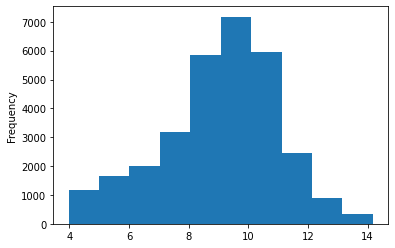

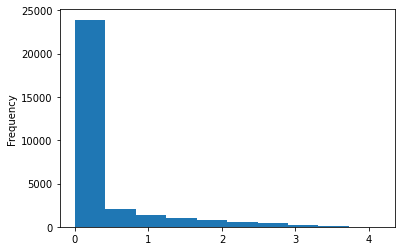

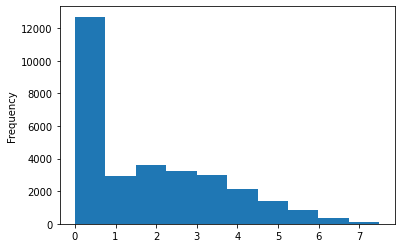

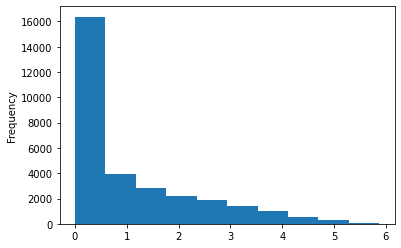

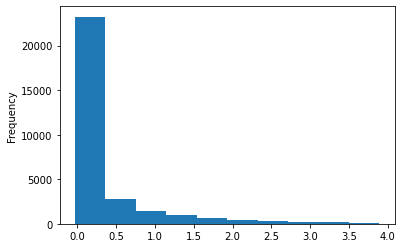

In [1341]:
for elt in liste :
    np.log1p(table[elt]).plot(kind="hist")
    plt.show()

<AxesSubplot:ylabel='Frequency'>

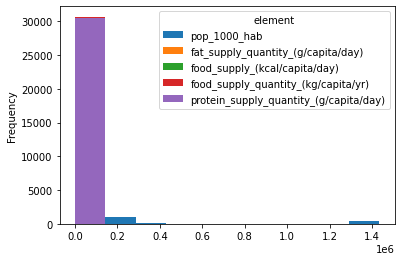

In [1342]:
table[['pop_1000_hab', 'type', 'item',
       'fat_supply_quantity_(g/capita/day)', 'food_supply_(kcal/capita/day)',
       'food_supply_quantity_(kg/capita/yr)',
       'protein_supply_quantity_(g/capita/day)']].plot(kind="hist")

In [1343]:
## Bonus : création d'un jeu de données qui contient les codes pays et leur zone géographique

In [1344]:
world = ['eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 'northern_america',
 'central_america', 'caribbean', 'south_america', 'central_asia', 'eastern_asia', 'southern_asia',
 'south_eastern_asia', 'western_asia', 'eastern_europe', 'northern_europe',
 'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia'
]


def transform_data(filename=None) :
    """
    Charge un jeu de données.

    Args:
        param1: This is the first param.
        param2: This is a second param.

    Returns:
        A DataFrame.

    Raises:
        KeyError: Raises an exception.
    """
    df = pd.read_csv('../geo_zone/'+filename+".csv", usecols=["Area Code (FAO)"])
    df['zone'] = filename
    return df


def aggregate_df(list_filename = world) :
    list_df = []
    for zone in world :
        temp = transform_data(zone)
        list_df.append(temp)
    df = pd.concat(list_df)
    df.columns = ['code_country', 'zone']
    return df

In [1345]:
zone = aggregate_df()

In [1346]:
len(table["area_code_(fao)"].unique())

179

In [1347]:
data = pd.merge(zone, table, left_on='code_country', right_on="area_code_(fao)")

3) Quelle est la population de l’Ukraine en 2018 ? L’output doit être un int (pas un DataFrame)

In [1348]:
table.head()

element,area_code_(fao),area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,1,Armenia,2018,2952.0,animal product,"Aquatic Animals, Others",0.00,0.0,0.00,0.00
1,1,Armenia,2018,2952.0,animal product,Aquatic Plants,0.00,0.0,0.00,0.00
2,1,Armenia,2018,2952.0,animal product,Bovine Meat,11.41,145.0,24.05,9.85
3,1,Armenia,2018,2952.0,animal product,"Butter, Ghee",3.54,31.0,1.59,0.04
4,1,Armenia,2018,2952.0,animal product,Cephalopods,0.00,0.0,0.01,0.00


In [1349]:
is_ukraine = data.area == 'Ukraine'
is2018 = data.year == 2018
is2019 = data.year == 2019

In [1350]:
mask0=table['area'].str.contains('kr')
table.loc[is2019]

element,area_code_(fao),area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
85,1,Armenia,2019,2958.0,animal product,Bovine Meat,14.48,185.0,30.77,12.65
86,1,Armenia,2019,2958.0,animal product,"Butter, Ghee",2.97,26.0,1.33,0.03
87,1,Armenia,2019,2958.0,animal product,Cephalopods,0.00,0.0,0.01,0.00
88,1,Armenia,2019,2958.0,animal product,Cream,0.02,0.0,0.04,0.00
89,1,Armenia,2019,2958.0,animal product,Crustaceans,0.00,0.0,0.35,0.09
...,...,...,...,...,...,...,...,...,...,...
30661,276,Sudan,2019,42813.0,veg product,Tomatoes and products,0.10,9.0,15.36,0.41
30662,276,Sudan,2019,42813.0,veg product,"Vegetables, other",0.14,20.0,27.51,0.90
30663,276,Sudan,2019,42813.0,veg product,Wheat and products,1.67,535.0,61.56,16.00
30664,276,Sudan,2019,42813.0,veg product,Wine,0.00,0.0,0.00,0.00


In [1351]:
table.area.unique()

array(['Armenia', 'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Barbados', 'Bangladesh',
       'Bolivia (Plurinational State of)', 'Botswana', 'Brazil', 'Belize',
       'Solomon Islands', 'Bulgaria', 'Myanmar', 'Burundi', 'Cameroon',
       'Canada', 'Cabo Verde', 'Central African Republic', 'Sri Lanka',
       'Chad', 'Chile', 'China, mainland', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Cuba', 'Cyprus', 'Azerbaijan', 'Benin', 'Denmark',
       'Dominica', 'Dominican Republic', 'Belarus', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Djibouti', 'Georgia', 'Gabon', 'Gambia',
       'Germany', 'Bosnia and Herzegovina', 'Ghana', 'Kiribati', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'China, Hong Kong SAR', 'Hungary', 'Croatia', 'Iceland', 'India',
       'Indonesia', 'Iran (Islamic

In [1352]:
mask2=table["area"]=="Ukraine"

In [1353]:
mask3=table['year']==2018

In [1354]:
table2 = table[['area', 'year', 'pop_1000_hab']]

In [1355]:
#L’output doit être un int (pas un DataFrame)

table3 = table2.loc[mask2&mask3]["pop_1000_hab"].iloc[0]

In [1356]:
#Autre option

table3 = table2.loc[mask2&mask3]["pop_1000_hab"].unique()[0]

In [1357]:
val = [1, 15, 69, 785, 10000, 5896321]

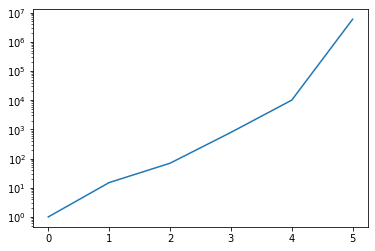

In [1358]:
plt.plot(val)
plt.yscale('log')
plt.show()

4) Quels sont les 10 pays les plus peuplés ?

In [1359]:
top_pays = table2.loc[is2019].sort_values(by=['pop_1000_hab'], ascending=False)

In [1360]:
coucou = top_pays['area'].unique()

In [1361]:
coucou[:10]

array(['China, mainland', 'India', 'United States of America',
       'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh',
       'Russian Federation', 'Mexico'], dtype=object)

5) Quelle est la population mondiale en 2018 ? En 2019 ? Est-ce que ce chiffre correspond à la réalité ? Menez votre enquête et faites les corrections nécessaires en cas de problème. Contrôlez vos données grâce à ce site.


In [1362]:
#Pop 2019
table2.loc[is2019]


element,area,year,pop_1000_hab
85,Armenia,2019,2958.0
86,Armenia,2019,2958.0
87,Armenia,2019,2958.0
88,Armenia,2019,2958.0
89,Armenia,2019,2958.0
...,...,...,...
30661,Sudan,2019,42813.0
30662,Sudan,2019,42813.0
30663,Sudan,2019,42813.0
30664,Sudan,2019,42813.0


In [1363]:
df_pop

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,37172.0,*,Unofficial figure
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38042.0,*,Unofficial figure
2,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,2883.0,*,Unofficial figure
3,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,2881.0,*,Unofficial figure
4,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,42228.0,*,Unofficial figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,FBS,Food Balances (2010-),249,Yemen,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,29162.0,*,Unofficial figure
354,FBS,Food Balances (2010-),251,Zambia,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,17352.0,*,Unofficial figure
355,FBS,Food Balances (2010-),251,Zambia,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,17861.0,*,Unofficial figure
356,FBS,Food Balances (2010-),181,Zimbabwe,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,14439.0,*,Unofficial figure


In [1364]:
mask2019 = df_pop['Year'] == 2019

In [1365]:
df_pop[mask2019]['Value'].sum()

7652392.11

In [1366]:
#Pop 2018
mask2018 = df_pop['Year'] == 2018

In [1367]:
df_pop[mask2018]['Value'].sum()

7572929.33

In [1368]:
table2.loc[mask3].describe()

element,year,pop_1000_hab
count,15332.0,1.533200e+04
mean,2018.0,4.333270e+04
std,0.0,1.529282e+05
min,2018.0,5.200000e+01
25%,2018.0,2.883000e+03
50%,2018.0,9.965000e+03
75%,2018.0,3.152800e+04
max,2018.0,1.427648e+06


In [1369]:
table2.drop_duplicates().sum()

element
area            ArmeniaArmeniaAfghanistanAfghanistanAlbaniaAlb...
year                                                       722623
pop_1000_hab                                          15225321.44
dtype: object

In [1370]:
table2

element,area,year,pop_1000_hab
0,Armenia,2018,2952.0
1,Armenia,2018,2952.0
2,Armenia,2018,2952.0
3,Armenia,2018,2952.0
4,Armenia,2018,2952.0
...,...,...,...
30661,Sudan,2019,42813.0
30662,Sudan,2019,42813.0
30663,Sudan,2019,42813.0
30664,Sudan,2019,42813.0


In [1371]:
sum(table['pop_1000_hab'].unique())

15217224.44

Comparer les fichiers food_supply et pop_annuelle

In [1372]:
df_pop2018.describe()

,Area Code (FAO),Element Code,Item Code,Year Code,Year,Value
count,1108.000000,1108.000000,1108.0,1108.0,1108.0,1.108000e+03
mean,133.091155,530.554152,3010.0,2018.0,2018.0,2.066295e+04
std,76.836173,22.019736,0.0,0.0,0.0,8.761875e+04
min,1.000000,511.000000,3010.0,2018.0,2018.0,0.000000e+00
25%,68.000000,512.000000,3010.0,2018.0,2018.0,3.654385e+02
50%,131.500000,513.000000,3010.0,2018.0,2018.0,3.384867e+03
75%,197.000000,551.000000,3010.0,2018.0,2018.0,1.241412e+04
max,299.000000,561.000000,3010.0,2018.0,2018.0,1.427648e+06


In [1373]:
df_pop2018.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2018,2018,1000 persons,37171.921,X,International reliable sources,NaN
1,OA,Annual population,2,Afghanistan,512,Total Population - Male,3010,Population - Est. & Proj.,2018,2018,1000 persons,19093.043,X,International reliable sources,NaN
2,OA,Annual population,2,Afghanistan,513,Total Population - Female,3010,Population - Est. & Proj.,2018,2018,1000 persons,18078.879,X,International reliable sources,NaN
3,OA,Annual population,2,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,2018,2018,1000 persons,27099.874,X,International reliable sources,NaN
4,OA,Annual population,2,Afghanistan,561,Urban population,3010,Population - Est. & Proj.,2018,2018,1000 persons,9273.302,X,International reliable sources,"UNDESA, Population Division – World Urbanizati..."


In [1374]:
df_pop2018['Area'] == 'Japon'

0       False
1       False
2       False
3       False
4       False
        ...  
1103    False
1104    False
1105    False
1106    False
1107    False
Name: Area, Length: 1108, dtype: bool

In [1375]:
coucou2 = df_pop2018['Area'].unique()

In [1376]:

lister = []
for elt in coucou2:
    if elt not in coucou:
        lister.append(elt)
print(lister)
print(len(lister))



['American Samoa', 'Andorra', 'Anguilla', 'Aruba', 'Bahrain', 'Bermuda', 'Bhutan', 'Bonaire, Sint Eustatius and Saba', 'British Virgin Islands', 'Brunei Darussalam', 'Cayman Islands', 'Channel Islands', 'Cook Islands', 'Curaçao', 'Equatorial Guinea', 'Eritrea', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'French Guyana', 'Gibraltar', 'Greenland', 'Guadeloupe', 'Guam', 'Holy See', 'Isle of Man', 'Liechtenstein', 'Marshall Islands', 'Martinique', 'Mayotte', 'Micronesia (Federated States of)', 'Monaco', 'Montserrat', 'Nauru', 'Netherlands Antilles (former)', 'Niue', 'Northern Mariana Islands', 'Palau', 'Palestine', 'Puerto Rico', 'Qatar', 'Réunion', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Pierre and Miquelon', 'Saint-Martin (French part)', 'San Marino', 'Singapore', 'Sint Maarten (Dutch part)', 'Somalia', 'South Sudan', 'Tokelau', 'Tonga', 'Turks and Caicos Islands', 'Tuvalu', 'United States Virgin Islands', 'Wallis and Futuna Islands', 'Western Saha

In [1377]:
for elt in lister:
    i=0
    mask9 = df_pop2018['Area'] == elt
    i = i + df_pop2018.loc[mask9]['Value'].unique()[0]
print(i)

567.402


In [1378]:
mask10 = df_pop2018['Area'] == 'American Samoa'

In [1379]:
df_pop2018.loc[mask10].head(10)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
15,OA,Annual population,5,American Samoa,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2018,2018,1000 persons,55.465,X,International reliable sources,NaN
16,OA,Annual population,5,American Samoa,551,Rural population,3010,Population - Est. & Proj.,2018,2018,1000 persons,7.153,X,International reliable sources,NaN
17,OA,Annual population,5,American Samoa,561,Urban population,3010,Population - Est. & Proj.,2018,2018,1000 persons,48.526,X,International reliable sources,"UNDESA, Population Division – World Urbanizati..."


In [1380]:
sum(df_pop2018['Value'])

22894547.491999973

In [1381]:
df_pop2018.loc[mask10]['Value'].unique()[0]

55.465

6) Pour quels pays dispose-t-on du moins d’informations (nombre de valeurs manquantes) ? Donnez-en 5.


In [1382]:
# isna() transforme les valeurs manquantes en True (1)/ False (0) et additionne ces valeurs
min_pays=data.drop('area', 1).isna().groupby(data.area, sort=False).sum().reset_index()

/tmp/ipykernel_7964/4194465220.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  min_pays=data.drop('area', 1).isna().groupby(data.area, sort=False).sum().reset_index()


In [1383]:
min_pays

,area,code_country,zone,area_code_(fao),year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,Burundi,0,0,0,0,0,0,0,0,0,0,0
1,Comoros,0,0,0,0,0,0,0,0,0,0,0
2,Djibouti,0,0,0,0,0,0,0,0,0,0,0
3,Ethiopia,0,0,0,0,0,0,0,2,4,0,2
4,Kenya,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
174,Solomon Islands,0,0,0,0,0,0,0,0,0,0,0
175,Vanuatu,0,0,0,0,0,0,0,3,0,0,6
176,Kiribati,0,0,0,0,0,0,0,0,0,0,0
177,French Polynesia,0,0,0,0,0,0,0,0,0,0,0


In [1384]:
#Calculer nombre valeurs non manquantes par ligne
(min_pays == 0).astype(int).sum(axis=1)

0      11
1      11
2      11
3       8
4      11
       ..
174    11
175     9
176    11
177    11
178    11
Length: 179, dtype: int64

In [1385]:
#Afficher nombre de valeurs manquantes par pays
min_pays = min_pays.set_index('area')
min_pays = min_pays.sum(axis=1)
min_pays.sort_values(ascending=False).head(5)

area
Chad                                     34
Democratic People's Republic of Korea    32
Albania                                  24
Haiti                                    24
Czechia                                  24
dtype: int64

7) Créez une nouvelle colonne taux_croissance_pop_18_19 avec le taux de variation de la population entre 2018 et 2019 dans chaque pays. Affichez les 5 pays avec le taux de croissance démographique le plus élevé.


In [1386]:
df_pop2_pivot= df_pop2.pivot_table(
    index=['Area', 'Area Code (FAO)'], #toutes les colonnes à conserver
    columns= ['Year'],
    values='Value'
).reset_index()

In [1387]:
df_pop2_pivot.set_index('Area')

Year,Area Code (FAO),2018,2019
Area,,,
Afghanistan,2,37172.0,38042.0
Albania,3,2883.0,2881.0
Algeria,4,42228.0,43053.0
Angola,7,30810.0,31825.0
Antigua and Barbuda,8,96.0,97.0
...,...,...,...
Venezuela (Bolivarian Republic of),236,28887.0,28516.0
Viet Nam,237,95546.0,96462.0
Yemen,249,28499.0,29162.0


In [1388]:
df_pop2_pivot['taux_de_croissance'] = (df_pop2_pivot[2019] - df_pop2_pivot[2018]) /df_pop2_pivot[2018]

In [1389]:
df_pop2_pivot_tx = df_pop2_pivot[['Area', 'taux_de_croissance']]

In [1390]:
tableau = pd.merge(data, df_pop2_pivot_tx, left_on='area', right_on='Area').drop('Area', axis=1)

8) Quel est le taux de croissance moyen en fonction de la zone géographique ?


In [1391]:
tableau.groupby('zone').mean()['taux_de_croissance'].sort_values(ascending=False)

zone
western_africa           0.026344
middle_africa            0.026285
eastern_africa           0.023585
melanesia                0.017430
micronesia               0.017241
central_asia             0.017138
northern_africa          0.017065
southern_asia            0.016049
southern_africa          0.014679
central_america          0.013623
western_asia             0.013015
south_eastern_asia       0.011672
australia_new_zealand    0.010331
south_america            0.008972
northern_america         0.007550
caribbean                0.007060
eastern_asia             0.005987
polynesia                0.004335
western_europe           0.002682
northern_europe          0.002221
southern_europe         -0.001863
eastern_europe          -0.002178
Name: taux_de_croissance, dtype: float64

9) Calculez la disponibilité de nourriture totale par pays et par année, en kcal et kg de protéines. Attention aux unités de mesure !

In [1392]:
#Calcul totaux par année, par pays(pop_hab)
data['food_total(kcal/pays/year)']=data['food_supply_(kcal/capita/day)']*365000*data['pop_1000_hab']
data['food_total(protein kg/pays/year)']=data['protein_supply_quantity_(g/capita/day)']*365*data['pop_1000_hab'] #ou *1000 pour toute la po et /1000 pour passer des g aux kg

In [1393]:
#Sélection colonnes pour total_food_kcal
total_food_kcal=data.groupby(['area', 'year'])['food_total(kcal/pays/year)'].sum().reset_index()

In [1394]:
#Sélection ligne par masques 
total_food_kcal[(total_food_kcal.area=='China, mainland')&(total_food_kcal.year==2019)]

,area,year,food_total(kcal/pays/year)
69,"China, mainland",2019,1.750543e+15


In [1395]:
#Sélection colonnes total_food_prot
total_food_prot=data.groupby(['area', 'year'])['food_total(protein kg/pays/year)'].sum().reset_index()

In [1396]:
#Sélection ligne par masques 
total_food_prot[(total_food_prot.area=='China, mainland')&(total_food_prot.year==2018)]

,area,year,food_total(protein kg/pays/year)
68,"China, mainland",2018,5.455307e+10


In [1397]:
#Autre option par pivot mais moins manipulable
data_pivot=data.pivot_table(
    index=['area','pop_1000_hab',
       'food_supply_(kcal/capita/day)', 
       'protein_supply_quantity_(g/capita/day)'],
    columns=['year'],
    values=['food_total(kcal/pays/year)','food_total(protein kg/pays/year)']
)

In [1398]:
#Affichage unique par pays
new_data_pivot=data_pivot.groupby('area').sum().reset_index()

In [1399]:
new_data_pivot

area food_total(kcal/pays/year)  \
year                                                           2018   
0                            Afghanistan               3.066318e+13   
1                                Albania               3.466260e+12   
2                                Algeria               5.198879e+13   
3                                 Angola               2.725946e+13   
4                    Antigua and Barbuda               8.567280e+10   
..                                   ...                        ...   
174   Venezuela (Bolivarian Republic of)               2.338605e+13   
175                             Viet Nam               1.015539e+14   
176                                Yemen               2.075226e+13   
177                               Zambia               1.421866e+13   
178                             Zimbabwe               9.855339e+12   

                   food_total(protein kg/pays/year)                
year          2019                             2018          2019  
0     3.142250e+13                     7.806901e+08  7.942409e+08  
1     3.497505e+12                     1.186357e+08  1.218343e+08  
2     5.478021e+13                     1.390581e+09  1.426234e+09  
3     2.830850e+13                     6.036665e+08  6.033415e+08  
4     8.419309e+10                     2.816866e+06  2.844084e+06  
..             ...                              ...           ...  
174   2.281508e+13                     5.310889e+08  5.347805e+08  
175   1.031261e+14                     3.008256e+09  3.103641e+09  
176   2.135212e+13                     5.333175e+08  5.670128e+08  
177   1.472050e+13                     3.670252e+08  3.959150e+08  
178   9.001696e+12                     2.249336e+08  2.032865e+08  

[179 rows x 5 columns]

In [1400]:
data_pivot=data.pivot_table(
    index=['area','pop_1000_hab', 
       'protein_supply_quantity_(g/capita/day)'],
    columns=['year'],
    values=['food_total(protein kg/pays/year)']
).reset_index()

In [1401]:
data_pivot

area pop_1000_hab protein_supply_quantity_(g/capita/day)  \
year                                                                     
0      Afghanistan      37172.0                                   0.00   
1      Afghanistan      37172.0                                   0.01   
2      Afghanistan      37172.0                                   0.02   
3      Afghanistan      37172.0                                   0.03   
4      Afghanistan      37172.0                                   0.04   
...            ...          ...                                    ...   
13588     Zimbabwe      14645.0                                   1.40   
13589     Zimbabwe      14645.0                                   2.19   
13590     Zimbabwe      14645.0                                   2.97   
13591     Zimbabwe      14645.0                                   6.11   
13592     Zimbabwe      14645.0                                  15.08   

      food_total(protein kg/pays/year)               
year                              2018         2019  
0                                  0.0          NaN  
1                             135677.8          NaN  
2                             271355.6          NaN  
3                             407033.4          NaN  
4                             542711.2          NaN  
...                                ...          ...  
13588                              NaN   7483595.00  
13589                              NaN  11706480.75  
13590                              NaN  15875912.25  
13591                              NaN  32660546.75  
13592                              NaN  80609009.00  

[13593 rows x 5 columns]

10) Calculez le ratio énergie/poids de chaque produit et pays. Vous devriez vous apercevoir qu’étonnement, ces informations varient en fonction du pays. Pour pallier ce problème, calculez la moyenne de ce ratio pour chaque aliment.  Attention à bien gérer les valeurs égales à 0. Vérifiez la cohérence de votre calcul en comparant le résultat avec l’apport calorique d’un œuf.

In [1402]:
data.groupby(['area','item']).sum()
data['ratio_energy_poids']=(data['food_supply_(kcal/capita/day)']*365)/(data['food_supply_quantity_(kg/capita/yr)']+0.1)


In [1403]:
data

,code_country,zone,area_code_(fao),area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),food_total(kcal/pays/year),food_total(protein kg/pays/year),ratio_energy_poids
0,29,eastern_africa,29,Burundi,2018,11175.37,animal product,Aquatic Plants,0.00,0.0,0.00,0.00,0.000000e+00,0.000,0.000000
1,29,eastern_africa,29,Burundi,2018,11175.37,animal product,Bovine Meat,0.37,5.0,0.95,0.38,2.039505e+10,1550023.819,1738.095238
2,29,eastern_africa,29,Burundi,2018,11175.37,animal product,"Butter, Ghee",0.08,1.0,0.03,0.00,4.079010e+09,0.000,2807.692308
3,29,eastern_africa,29,Burundi,2018,11175.37,animal product,Cream,0.00,0.0,0.00,0.00,0.000000e+00,0.000,0.000000
4,29,eastern_africa,29,Burundi,2018,11175.37,animal product,Crustaceans,0.00,0.0,0.00,0.00,0.000000e+00,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30661,244,polynesia,244,Samoa,2019,197.00,veg product,Tomatoes and products,0.00,0.0,0.43,0.01,0.000000e+00,719.050,0.000000
30662,244,polynesia,244,Samoa,2019,197.00,veg product,"Vegetables, other",0.08,10.0,12.29,0.58,7.190500e+08,41704.900,294.592413
30663,244,polynesia,244,Samoa,2019,197.00,veg product,Wheat and products,6.63,589.0,57.93,15.87,4.235204e+10,1141132.350,3704.721696
30664,244,polynesia,244,Samoa,2019,197.00,veg product,Wine,0.00,2.0,0.57,0.00,1.438100e+08,0.000,1089.552239


In [1404]:
resulti = data.groupby(['area','item']).sum()['ratio_energy_poids']

In [1405]:
resultio = data.groupby('item').mean()['ratio_energy_poids'].reset_index()

In [1406]:
resultio

,item,ratio_energy_poids
0,"Alcohol, Non-Food",NaN
1,Apples and products,433.353226
2,"Aquatic Animals, Others",15.748132
3,Aquatic Plants,6.167442
4,Bananas,539.618054
...,...,...
93,Tomatoes and products,228.776864
94,"Vegetables, other",276.155831
95,Wheat and products,2982.942295
96,Wine,459.481955


In [1407]:
resultio[resultio.item== "Eggs"]

,item,ratio_energy_poids
27,Eggs,1294.279455


In [1408]:
#apport calorique d'un oeuf : 100g =155calories   donc 155/100 1.55 de ratio, notre resultat est plutot cohérent


11) À l’instar de la question précédente, calculez le pourcentage de protéine de chaque aliment. Vérifiez votre résultat en le comparant avec l’apport en protéines d’un œuf.


In [1409]:
data.groupby(['item'])
data['pourcentage_prot']=(data['food_supply_quantity_(kg/capita/yr)']/((data['protein_supply_quantity_(g/capita/day)']+0.1*365/1000)))*100

In [1410]:
data[data.area=='France']

,code_country,zone,area_code_(fao),area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),food_total(kcal/pays/year),food_total(protein kg/pays/year),ratio_energy_poids,pourcentage_prot
28171,68,western_europe,68,France,2018,66931.0,animal product,"Aquatic Animals, Others",0.00,0.0,0.02,0.00,0.000000e+00,0.000000e+00,0.000000,54.794521
28172,68,western_europe,68,France,2018,66931.0,animal product,Aquatic Plants,0.00,0.0,0.00,0.00,0.000000e+00,0.000000e+00,0.000000,0.000000
28173,68,western_europe,68,France,2018,66931.0,animal product,Bovine Meat,3.50,66.0,20.70,8.17,1.612368e+12,1.995916e+08,1158.173077,252.239079
28174,68,western_europe,68,France,2018,66931.0,animal product,"Butter, Ghee",15.75,139.0,7.09,0.17,3.395744e+12,4.153069e+06,7056.328234,3433.414044
28175,68,western_europe,68,France,2018,66931.0,animal product,Cephalopods,0.03,2.0,0.89,0.35,4.885963e+10,8.550435e+06,737.373737,230.271669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28334,68,western_europe,68,France,2019,65130.0,veg product,Tomatoes and products,0.12,11.0,21.57,0.53,2.614970e+11,1.259940e+07,185.279188,3807.590468
28335,68,western_europe,68,France,2019,65130.0,veg product,"Vegetables, other",0.39,52.0,65.06,2.57,1.236167e+12,6.109520e+07,291.282996,2496.067523
28336,68,western_europe,68,France,2019,65130.0,veg product,Wheat and products,4.20,898.0,120.05,28.92,2.134766e+13,6.874993e+08,2728.006658,414.587398
28337,68,western_europe,68,France,2019,65130.0,veg product,Wine,0.00,75.0,40.36,0.00,1.782934e+12,0.000000e+00,676.594167,110575.342466


12) Quels sont les 10 aliments les plus caloriques ?

In [1414]:
data.set_index(['item'])

,code_country,zone,area_code_(fao),area,year,pop_1000_hab,type,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),food_total(kcal/pays/year),food_total(protein kg/pays/year),ratio_energy_poids,pourcentage_prot
item,,,,,,,,,,,,,,,
Aquatic Plants,29,eastern_africa,29,Burundi,2018,11175.37,animal product,0.00,0.0,0.00,0.00,0.000000e+00,0.000,0.000000,0.000000
Bovine Meat,29,eastern_africa,29,Burundi,2018,11175.37,animal product,0.37,5.0,0.95,0.38,2.039505e+10,1550023.819,1738.095238,228.091236
"Butter, Ghee",29,eastern_africa,29,Burundi,2018,11175.37,animal product,0.08,1.0,0.03,0.00,4.079010e+09,0.000,2807.692308,82.191781
Cream,29,eastern_africa,29,Burundi,2018,11175.37,animal product,0.00,0.0,0.00,0.00,0.000000e+00,0.000,0.000000,0.000000
Crustaceans,29,eastern_africa,29,Burundi,2018,11175.37,animal product,0.00,0.0,0.00,0.00,0.000000e+00,0.000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tomatoes and products,244,polynesia,244,Samoa,2019,197.00,veg product,0.00,0.0,0.43,0.01,0.000000e+00,719.050,0.000000,924.731183
"Vegetables, other",244,polynesia,244,Samoa,2019,197.00,veg product,0.08,10.0,12.29,0.58,7.190500e+08,41704.900,294.592413,1993.511760
Wheat and products,244,polynesia,244,Samoa,2019,197.00,veg product,6.63,589.0,57.93,15.87,4.235204e+10,1141132.350,3704.721696,364.190740


In [1415]:
data['ratio_energy_poids'].reset_index().sort_values(by=['ratio_energy_poids'],ascending=False).head(10)

,index,ratio_energy_poids
25475,25475,434350.0
28624,28624,405150.0
28545,28545,390550.0
23086,23086,383250.0
28153,28153,372300.0
25390,25390,365000.0
28071,28071,361350.0
23253,23253,357700.0
28144,28144,354050.0
28062,28062,346750.0


13. Quels sont les 10 aliments les plus riches en protéines ?

g

14. Créez une boîte à moustache de la quantité de nourriture moyenne disponible par habitant en kcal par zone géographique. Afin d’optimiser l’affichage modifier les éléments nécessaires si besoin :
Mettez un titre
La taille du graphique
Étiquettes des axes, 
Les axes 
la couleur en fonction de chaque boite à moustache
Effectuez ce graphique en utilisant la librairie de visualisation seaborn.

15. Question bonus : Avec la disponibilité alimentaire de produits végétaux combien d’êtres humains pourrait-on nourrir ?